In [14]:
import pandas as pd
import numpy as np
from keras import Sequential,layers,optimizers
from keras.layers import Dense

In [2]:
X=pd.read_csv('HCV_feats.csv')
y=pd.read_csv('HCV_target.csv')

In [9]:
X.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading
0,56,1,35,2,1,1,1,2,2,2,...,81,5,5,5,655330,634536,288194,5,5,13
1,46,1,29,1,2,2,1,2,2,1,...,113,57,123,44,40620,538635,637056,336804,31085,4
2,57,1,33,2,2,2,2,1,1,1,...,116,5,5,5,571148,661346,5,735945,558829,4
3,49,2,33,1,2,1,2,1,2,1,...,88,48,77,33,1041941,449939,585688,744463,582301,10
4,59,1,32,1,1,2,1,2,2,2,...,120,94,90,30,660410,738756,3731527,338946,242861,11


In [5]:
print(X.shape,y.shape)
print(np.unique(y))

(1385, 28) (1385, 1)
[0 1]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import random

In [11]:
seed=1
np.random.seed(seed)
random.set_seed(seed)
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X),columns=X.columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed,shuffle=False)

In [12]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1108, 28) (277, 28) (1108, 1) (277, 1)


In [15]:
def create_model():
    model=Sequential()
    model.add(Dense(units = 3, activation = 'tanh', input_dim=X_train.shape[1]))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model


D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
50/50 - 4s - 83ms/step - accuracy: 0.4975 - loss: 0.8140 - val_accuracy: 0.5315 - val_loss: 0.8150
Epoch 2/100
50/50 - 0s - 7ms/step - accuracy: 0.4955 - loss: 0.7917 - val_accuracy: 0.5225 - val_loss: 0.7960
Epoch 3/100
50/50 - 3s - 56ms/step - accuracy: 0.5035 - loss: 0.7736 - val_accuracy: 0.5135 - val_loss: 0.7804
Epoch 4/100
50/50 - 0s - 9ms/step - accuracy: 0.5045 - loss: 0.7590 - val_accuracy: 0.5135 - val_loss: 0.7675
Epoch 5/100
50/50 - 2s - 45ms/step - accuracy: 0.5075 - loss: 0.7470 - val_accuracy: 0.5405 - val_loss: 0.7569
Epoch 6/100
50/50 - 2s - 40ms/step - accuracy: 0.5095 - loss: 0.7371 - val_accuracy: 0.5405 - val_loss: 0.7481
Epoch 7/100
50/50 - 1s - 12ms/step - accuracy: 0.5135 - loss: 0.7290 - val_accuracy: 0.5315 - val_loss: 0.7407
Epoch 8/100
50/50 - 1s - 12ms/step - accuracy: 0.5095 - loss: 0.7222 - val_accuracy: 0.5495 - val_loss: 0.7345
Epoch 9/100
50/50 - 1s - 29ms/step - accuracy: 0.5186 - loss: 0.7165 - val_accuracy: 0.5495 - val_loss: 0.7294
Epo

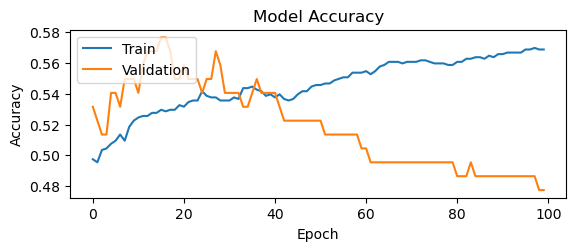

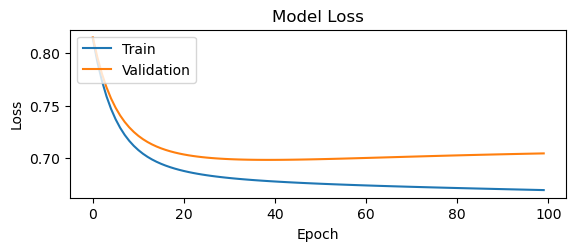

In [16]:
clf=create_model()
history=clf.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.1,shuffle=False,verbose=2)
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'],loc='upper left')
plt.show()
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'],loc='upper left')
plt.show()
